<a href="https://colab.research.google.com/github/Bjoyita/ImageProcessing/blob/main/WatershedParticleSize_HandDrawnImMarch2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

**LOADING AND READING IMAGE**

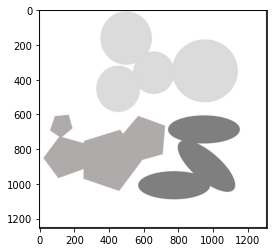

In [ ]:
im1 = io.imread("O3.jpg")
plt.imshow(im1, cmap ='gray')

In [ ]:
im1.shape

(1254, 1313, 3)

**Converting to grayscale**

In [ ]:
from skimage.color import rgb2gray
im2 = rgb2gray(im1)
im2.shape

(1254, 1313)

**Thresholding: to get the binary image**

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show>

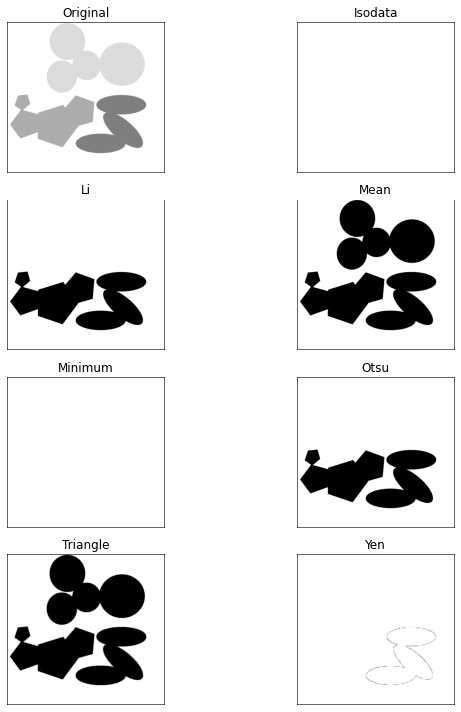

In [ ]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(im2, figsize=(10, 10), verbose=True)
plt.show

In [ ]:
from skimage.filters import threshold_mean
th = threshold_mean(im2)
print(th)

0.8790813146020484


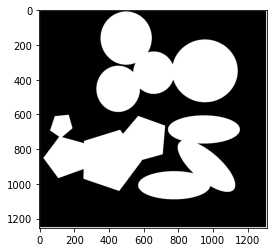

In [ ]:
binary = im2 < th
plt.imshow(binary, cmap='gray')

In [ ]:
binary.dtype

dtype('bool')

**Function computes the Euclidean distance to the closest zero (i.e., background pixel) for each of the foreground pixels**

In [ ]:
distance = ndi.distance_transform_edt(binary)

In [ ]:
distance.dtype

dtype('float64')

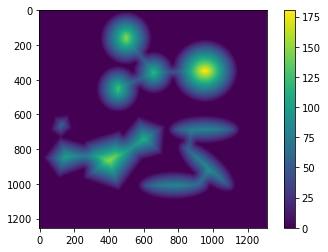

In [ ]:
from matplotlib.colors import Colormap
colormap = plt.imshow(distance)
cbar = plt.colorbar(colormap)

**Coordinates of the peaks (local maxima)**

In [ ]:
coords = peak_local_max(distance, min_distance =100)

In [ ]:
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True

**Watershed Algorithm: Segmentation**

In [ ]:
markers,_= ndi.label(mask)
#labels = watershed(binary, markers = markers, watershed_line=False)
individual_particles = watershed(-distance, markers, mask=binary)


Text(0.5, 1.0, 'Separated objects')

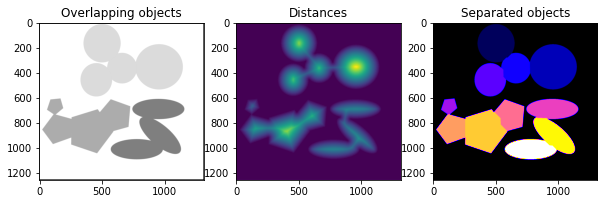

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(im2, cmap='gray')
ax[0].set_title('Overlapping objects')
ax[1].imshow(distance)
ax[1].set_title('Distances')
ax[2].imshow(individual_particles, cmap='gnuplot2')
ax[2].set_title('Separated objects')

In [ ]:
plt.imsave('labeled_objects.jpg', individual_particles)

In [ ]:
individual_particles.dtype

dtype('int32')

MEASUREMENT SECTION: PARTICLE SIZE


In [ ]:
from skimage.measure import label, regionprops, regionprops_table
label_img = label(individual_particles, connectivity = im2.ndim)
print(label_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


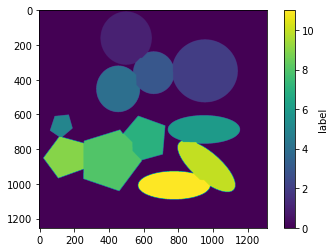

In [ ]:
plt.imshow(label_img)
c=plt.colorbar(plt.imshow(label_img))
c_i = c.set_label('label')


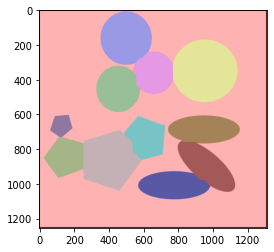

In [ ]:
from skimage.color import label2rgb
o = label2rgb(label_img, image = im2, bg_label=-1)
plt.imshow(o)
plt.imsave("overlay_color.jpg", o) 

In [ ]:
props=regionprops(label_img, im2)
for p in props:
    display('label: {} area: {}'.format(p.label, p.area))
         
props_t = regionprops_table(label_img, im2, properties=['label','area', 'equivalent_diameter','solidity'])

df = pd.DataFrame(props_t)

print(df)

#Convert to micron scale
scale = 0.005 #microns/pixel
df['area_sqmicrons'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
df


'label: 1 area: 70500'

'label: 2 area: 107003'

'label: 3 area: 43747'

'label: 4 area: 51747'

'label: 5 area: 11533'

'label: 6 area: 52878'

'label: 7 area: 40827'

'label: 8 area: 82323'

'label: 9 area: 38378'

'label: 10 area: 52124'

'label: 11 area: 51420'

    label    area  equivalent_diameter  solidity
0       1   70500           299.605387  0.993475
1       2  107003           369.107641  0.996183
2       3   43747           236.009344  0.980852
3       4   51747           256.683320  0.983765
4       5   11533           121.178677  0.984212
5       6   52878           259.473237  0.988448
6       7   40827           227.996822  0.963992
7       8   82323           323.754381  0.979499
8       9   38378           221.052906  0.992808
9      10   52124           257.616649  0.983119
10     11   51420           255.871017  0.986532


,label,area,equivalent_diameter,solidity,area_sqmicrons,equivalent_diameter_microns
0,1,70500,299.605387,0.993475,1.762500,1.498027
1,2,107003,369.107641,0.996183,2.675075,1.845538
2,3,43747,236.009344,0.980852,1.093675,1.180047
3,4,51747,256.683320,0.983765,1.293675,1.283417
4,5,11533,121.178677,0.984212,0.288325,0.605893
5,6,52878,259.473237,0.988448,1.321950,1.297366
6,7,40827,227.996822,0.963992,1.020675,1.139984
7,8,82323,323.754381,0.979499,2.058075,1.618772
8,9,38378,221.052906,0.992808,0.959450,1.105265
9,10,52124,257.616649,0.983119,1.303100,1.288083
